# Projections: Converting from projection to another

A map projection is a systematic transformation of the latitudes and longitudes into a plain surface. As map projections of gis-layers are fairly often defined differently (i.e. they do not match), it is a common procedure to redefine the map projections to be identical in both layers. It is important that the layers have the same projection as it makes it possible to analyze the spatial relationships between layer, such as conduct the Point in Polygon spatial query (which we will try next). 

## Changing the coordinate reference system of a layer in Geopandas

Defining a projection and changing it is easy in Geopandas. Let's continue working with our  [address points](), and change the Coordinate Reference System (CRS) from WGS84 into a projection called [ETRS GK-25](http://www.maanmittauslaitos.fi/ammattilaisille/maastotiedot/koordinaatti-korkeusjarjestelmat/karttaprojektiot-tasokoordinaatistot/tasokoordinaatistot/etrs-gkn) (EPSG:3879) which uses a Gauss-Krüger projection that is (sometimes) used in Finland. 

- Let's first read the data from the Shapefile that we [created previously]()

In [2]:
import geopandas as gpd

# Filepath to the addresses Shapefile
fp = r"/home/geo/addresses.shp"
fp = r"D:\KOODIT\Opetus\Automating-GIS-processes\AutoGIS-Sphinx\source\data\addresses.shp"

# Read data
data = gpd.read_file(fp)

 - Let's check what is the current CRS of our layer

In [3]:
data.crs

{'init': 'epsg:4326'}

Okey, so it is WGS84 (i.e. EPSG: 4326). 

 - Let's also check the values in our `geometry` column

In [10]:
data['geometry'].head()

0           POINT (24.9301701 60.1683731)
1           POINT (24.9418933 60.1698665)
2    POINT (24.9774004 60.18735880000001)
3    POINT (25.0919641 60.21448089999999)
4           POINT (24.9214846 60.1565781)
Name: geometry, dtype: object

Okey, so they indeed look like lat-lon values. 

 - Let's convert those geometries into ETRS GK-25 projection (EPSG: 3879). Changing the projection is really easy to [do in Geopandas](http://geopandas.org/projections.html#re-projecting) with `.to_crs()` -function. As an input for the function, you should define the column containing the geometries, i.e. `geometry` in this case, and a `epgs` value of the projection that you want to use. 
 
   * Note: there is also possibility to pass the projection information as proj4 strings or dictionaries, see more [here](http://geopandas.org/projections.html#coordinate-reference-systems)

In [4]:
# Let's take a copy of our layer
data_proj = data.copy()

# Reproject the geometries by replacing the values with projected ones
data_proj['geometry'] = data_proj['geometry'].to_crs(epsg=3879)

 - Let's see how they look now

In [5]:
data_proj['geometry'].head()

0    POINT (25496123.30852197 6672833.941567578)
1    POINT (25496774.28242895 6672999.698581985)
2     POINT (25498746.0795546 6674947.404346379)
3    POINT (25505098.34340289 6677972.568484426)
4    POINT (25495639.56049686 6671520.343245601)
Name: geometry, dtype: object

And here we go, the numbers have changed! Now we have successfully changed the projection of our layer into a new one. 

 - Let's still compare the layers visually

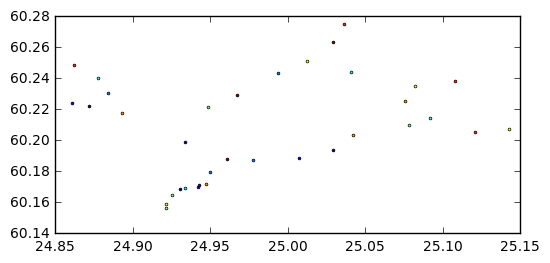

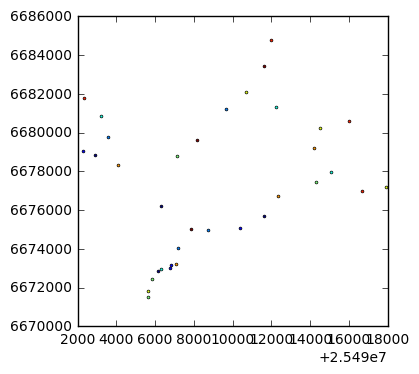

In [8]:
# Plot the WGS84 
data.plot()

# Plot the one with ETRS GK-25 projection
data_proj.plot()

Indeed, they look different and our re-projected one looks much better in Finland (not so stretced as in WGS84). 

 - Now we still need to change the crs of our GeoDataFrame into EPSG 3879 as now we only modified the values of the `geometry` column. We can take use of fiona's `from_epsg` -function. 

In [11]:
from fiona.crs import from_epsg

# Determine the CRS of the GeoDataFrame
data_proj.crs = from_epsg(3879)

# Let's see what we have
print(data_proj.crs)

{'init': 'epsg:3879', 'no_defs': True}


 - **Notice**: The above works for most EPSG codes but ETRS GK-25 projection is rather rare, so we still need to specify and make sure that .prj file is having correct coordinate system information by passing a proj4 dictionary below into it (otherwise the .prj file would be empty): 

In [18]:
# Pass the coordinate information
data_proj.crs = {'y_0': 0, 'no_defs': True, 'x_0': 25500000, 'k': 1, 'lat_0': 0, 'units': 'm', 'lon_0': 25, 'ellps': 'GRS80', 'proj': 'tmerc'}

# Check it
print(data_proj.crs)

{'lat_0': 0, 'y_0': 0, 'no_defs': True, 'x_0': 25500000, 'units': 'm', 'lon_0': 25, 'proj': 'tmerc', 'ellps': 'GRS80', 'k': 1}


 - Finally, let's save our projected layer into a Shapefile so that we can use it later.

In [15]:
# Ouput file path
outfp = r"/home/geo/addresses_epsg3879.shp"

# Save to disk
data_proj.to_file(outfp)